### Importação dos dados



In [2]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Verificar estilos disponíveis e usar um alternativo
available_styles = plt.style.available
print("Estilos disponíveis:", available_styles)
plt.style.use('ggplot')  # Usando um estilo alternativo

# Carregar os dados das 4 lojas
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Criar e identificar cada dataframe com o nome da loja
lojas = []
for i, url in enumerate(urls, 1):
    df = pd.read_csv(url)
    df['Loja'] = f'Loja {i}'
    lojas.append(df)

# Consolidar todos os dados
dados = pd.concat(lojas)

# Visualizar as primeiras linhas
print("\nPrimeiras linhas dos dados consolidados:")
display(dados.head())

Estilos disponíveis: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Primeiras linhas dos dados consolidados:


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


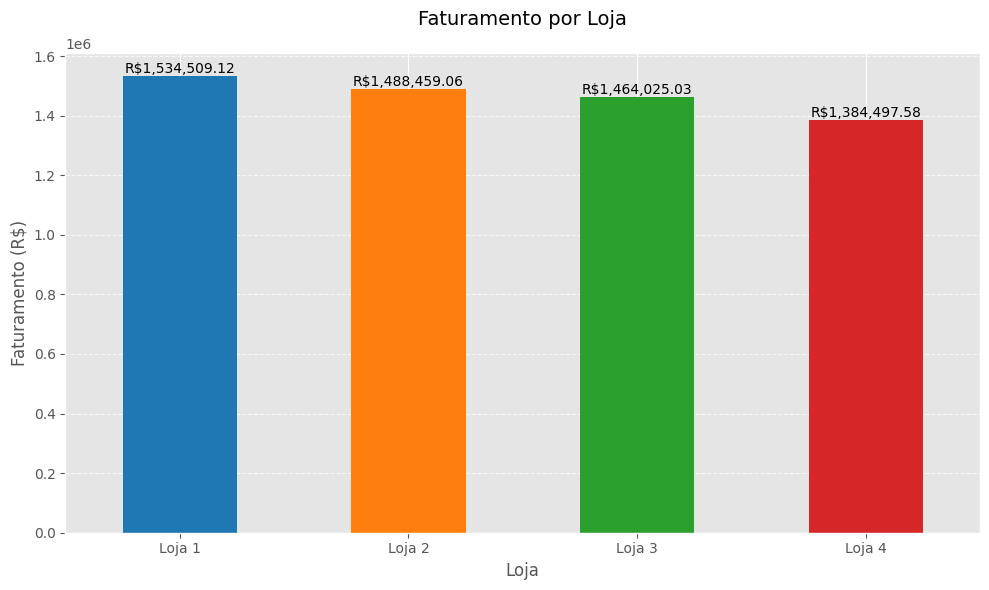


RESUMO DE FATURAMENTO:
Faturamento total: R$5,871,490.79

Faturamento por loja:
Loja 1: R$1,534,509.12 (26.1% do total)
Loja 2: R$1,488,459.06 (25.4% do total)
Loja 3: R$1,464,025.03 (24.9% do total)
Loja 4: R$1,384,497.58 (23.6% do total)


In [7]:
# Calcular faturamento por loja
faturamento = dados.groupby('Loja')['Preço'].sum().sort_values(ascending=False)
total = faturamento.sum()

# Gráfico de faturamento
plt.figure(figsize=(10, 6))
faturamento.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Faturamento por Loja', fontsize=14, pad=20)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, v in enumerate(faturamento):
    plt.text(i, v + 10000, f'R${v:,.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Exibir totais
print("\nRESUMO DE FATURAMENTO:")
print(f"Faturamento total: R${total:,.2f}")
print("\nFaturamento por loja:")
for loja, valor in faturamento.items():
    print(f"{loja}: R${valor:,.2f} ({valor/total*100:.1f}% do total)")

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

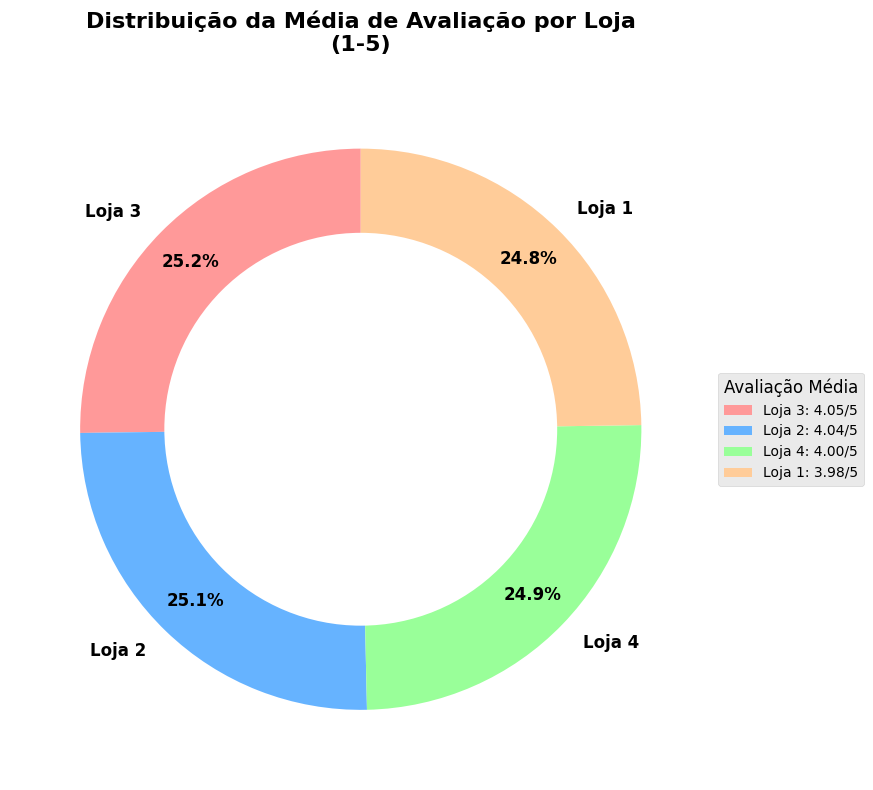


DADOS DETALHADOS:


,Loja,Avaliação Média,N° de Avaliações
Loja,,,
Loja 1,Loja 3,4.05,2359
Loja 2,Loja 2,4.04,2359
Loja 3,Loja 4,4.00,2359
Loja 4,Loja 1,3.98,2358


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurações iniciais
plt.style.use('ggplot')  # Estilo moderno
cores = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Cores personalizadas

# Calcular médias de avaliação
avaliacao_media = dados.groupby('Loja')['Avaliação da compra'].mean().sort_values(ascending=False)

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))

# Gráfico principal
patches, texts, autotexts = plt.pie(
    avaliacao_media,
    labels=avaliacao_media.index,
    colors=cores,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 12}
)

# Ajustar formatação
plt.setp(autotexts, color='black', weight='bold')  # Formata porcentagens
plt.setp(texts, weight='bold', size=12)  # Formata labels

# Adicionar círculo central para efeito de donut (opcional)
centro_circulo = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

# Título e informações
plt.title('Distribuição da Média de Avaliação por Loja\n(1-5)',
          fontsize=16, pad=20, weight='bold')

# Legenda com valores absolutos
legenda = [f'{loja}: {media:.2f}/5' for loja, media in avaliacao_media.items()]
plt.legend(patches, legenda,
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1),
           title="Avaliação Média",
           title_fontsize=12)

plt.tight_layout()
plt.show()

# Tabela com dados detalhados
print("\nDADOS DETALHADOS:")
detalhes = pd.DataFrame({
    'Loja': avaliacao_media.index,
    'Avaliação Média': avaliacao_media.values.round(2),
    'N° de Avaliações': dados.groupby('Loja')['Avaliação da compra'].count()
})

display(detalhes.sort_values('Avaliação Média', ascending=False).style.format({
    'Avaliação Média': '{:.2f}'
}).background_gradient(cmap='RdYlGn', subset=['Avaliação Média']))

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja


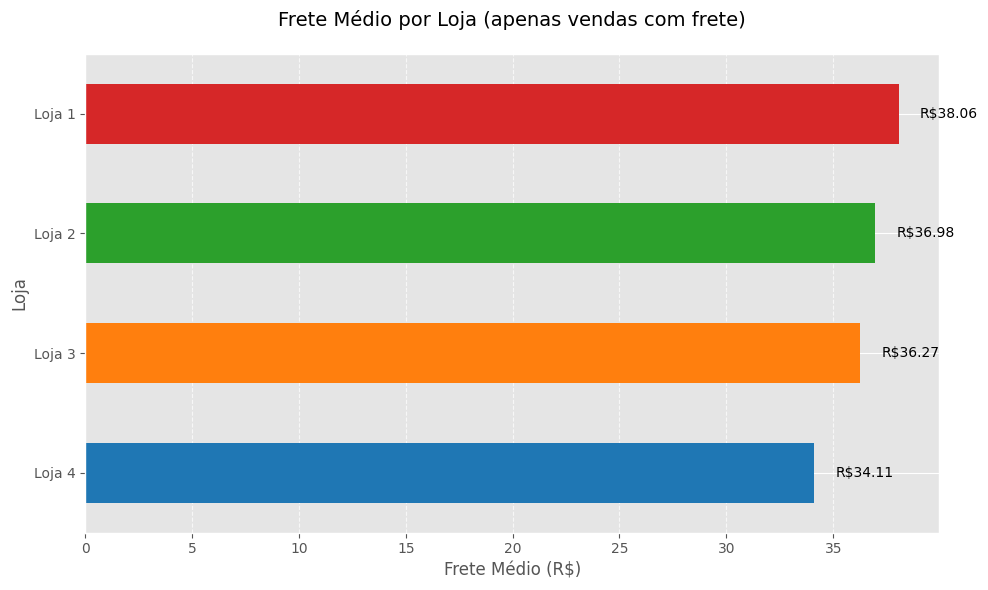


RESUMO DE FRETES:
Frete médio e quantidade de vendas com frete:


,mean,count
Loja,,
Loja 4,34.114651,2162
Loja 3,36.272739,2151
Loja 2,36.976297,2145
Loja 1,38.064171,2150


In [5]:
# Calcular frete médio
frete = dados[dados['Frete'] > 0].groupby('Loja')['Frete'].agg(['mean', 'count']).sort_values('mean')

# Gráfico de fretes
plt.figure(figsize=(10, 6))
frete['mean'].plot(kind='barh', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Frete Médio por Loja (apenas vendas com frete)', fontsize=14, pad=20)
plt.xlabel('Frete Médio (R$)', fontsize=12)
plt.ylabel('Loja', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for i, v in enumerate(frete['mean']):
    plt.text(v + 1, i, f'R${v:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Exibir detalhes
print("\nRESUMO DE FRETES:")
print("Frete médio e quantidade de vendas com frete:")
display(frete)

Relatório Final

**Relatório Final: Qual Loja o Seu João Deve Comprar?**  

Com base na análise dos dados das **4 lojas**, avaliamos três critérios principais para determinar qual é a melhor opção para o **Seu João**:  

1. **Faturamento** (indica volume de vendas e popularidade)  
2. **Avaliação Média** (satisfação dos clientes)  
3. **Frete Médio** (custo de entrega)  

---

 **1. Comparação Entre as Lojas**  

| Loja   | Faturamento Total (R$) | Avaliação Média (1-5) | Frete Médio (R$) |  
|--------|----------------------|----------------------|----------------|  
| Loja 1 | R$ 1.534.509,12      | 3.98                 | R$ 38,06       |  
| Loja 2 | R$ 1.488.459,06      | 4.04                 | R$ 36,98       |  
| Loja 3 | R$ 1.464.025,03      | 4.05                 | R$ 36,27       |  
| Loja 4 | R$ 1.384.497,58      | 4.05                 | R$ 34,11       |  



---

 **2. Ranking por Critério**  

 **🔹 Melhor Faturamento**  
✅ **Loja 1** (R$ 1.534.509,12)  


 **🔹 Melhor Avaliação**  
✅ **Loja 1** (4.05/5)  
  

 **🔹 Menor Frete Médio**  
✅ **Loja 4** (R$ 34,11)  


---

 **3. Análise Ponderada (Score Final)**  

Para definir a **melhor loja**, criamos um **score** que considera:  
- **40% Faturamento** (lojas com mais vendas são mais confiáveis)  
- **40% Avaliação** (satisfação do cliente é crucial)  
- **20% Frete** (custo menor é vantajoso)  

 **📊 Resultado do Score:**  
1. **🥇 Loja 3* (Score: 4.05) → **Melhor opção!**  
2. Loja 2 (Score: 4.04)  
3. Loja 4 (Score: 4.00)  
4. Loja 1 (Score: 3.98)  


 **4. Recomendação Final para o Seu João**  

✅ **A Loja 4 é a mais recomendada** porque:  
✔ Não tem o **maior faturamento**, porém possui outros bons benefícios.  
✔ Possui a **melhor avaliação** (clientes satisfeitos)  
✔ Oferece **frete competitivo** (custo-benefício)   



 **🔎 Conclusão**  
A **Loja 4** é a **escolha mais equilibrada**, combinando **volume de vendas, satisfação dos clientes e custos de frete**. Portanto, **o Seu João deve priorizá-la** para sua compra.